In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import cm
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import TruncatedSVD

Carga de Datos y Verficación de Data

In [442]:
# Cargar el archivo clases.txt
clases = pd.read_csv('clase.txt', delimiter=',')
# print(clases_mat)

# Cargar el archivo datasettissue.txt
data = pd.read_csv('dataset_tissue.txt', delimiter=',')
data = data.T
data = pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,...,22205,22206,22207,22208,22209,22210,22211,22212,22213,22214
Unnamed: 0,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at
GSM11805.CEL.gz,10.191267,6.040463,7.447409,12.025042,5.269269,8.535176,6.92169,5.71819,8.082076,5.434304,...,8.108419,5.251074,7.098663,8.210405,7.736744,6.434851,5.700448,9.211163,8.33913,7.367797
GSM11814.CEL.gz,10.509167,6.696075,7.775354,12.007817,5.180389,8.587241,6.96243,5.596042,7.568178,5.281319,...,8.072807,5.409345,6.905827,8.322514,8.192083,7.676989,6.566479,9.41598,8.214426,7.917754
GSM11823.CEL.gz,10.272027,6.144663,7.696235,11.633279,5.301714,8.277414,7.054633,5.576952,7.136474,5.282916,...,7.809687,5.297679,6.718544,8.404708,7.961902,6.424996,5.641277,8.192909,8.456095,7.598461
GSM11830.CEL.gz,10.252952,6.575153,8.478135,11.075286,5.372235,8.60365,7.115067,5.860551,8.605091,5.375391,...,8.036512,6.025769,6.716618,8.797825,8.325583,6.354779,5.754815,8.522238,8.558297,7.799779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM246493.CEL.gz,9.803686,6.058488,7.486711,9.914632,5.312712,7.421166,6.906639,5.778275,6.552426,5.435237,...,7.095949,5.362407,7.103406,7.972189,6.793989,6.216806,7.327094,8.452172,8.340901,7.658151
GSM246494.CEL.gz,10.509541,6.345526,7.468406,9.909784,5.341193,7.90008,6.982293,5.998825,6.779777,5.370535,...,7.056859,5.432815,7.047431,7.158617,7.924496,6.422848,10.260284,9.297665,8.258056,8.07374
GSM307639.CEL.gz,9.984502,6.715984,7.120793,9.409933,4.896124,8.119396,6.810089,5.965485,6.584802,5.420766,...,8.314995,5.65109,7.5469,7.872795,8.508173,7.154838,6.446923,8.753853,8.355681,7.907719
GSM307640.CEL.gz,9.937738,6.836179,7.125811,9.587782,5.296695,8.005432,6.976594,5.443173,6.64366,5.501452,...,7.860281,5.741697,7.509888,7.643282,8.384567,6.64589,7.64461,8.195537,8.589336,7.627872


In [443]:
#Escalamos la data para que todas la variables trabajen en la misma escala y la distancia que manejan los algoritmos no se confundan y den más peso a una variable que a otra.
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data_escaled = scaler.fit_transform(data.drop(['Unnamed: 0'], axis=0))
# print(data_escaled.shape)
data_escaled = data.drop(['Unnamed: 0'], axis=0)

Redimensión de la matriz Data: ¿PCA o SVD?

In [444]:
data_escaled = pd.DataFrame(data_escaled, columns = data.drop(['Unnamed: 0'], axis=0).columns)
data_escaled = data_escaled.to_numpy()

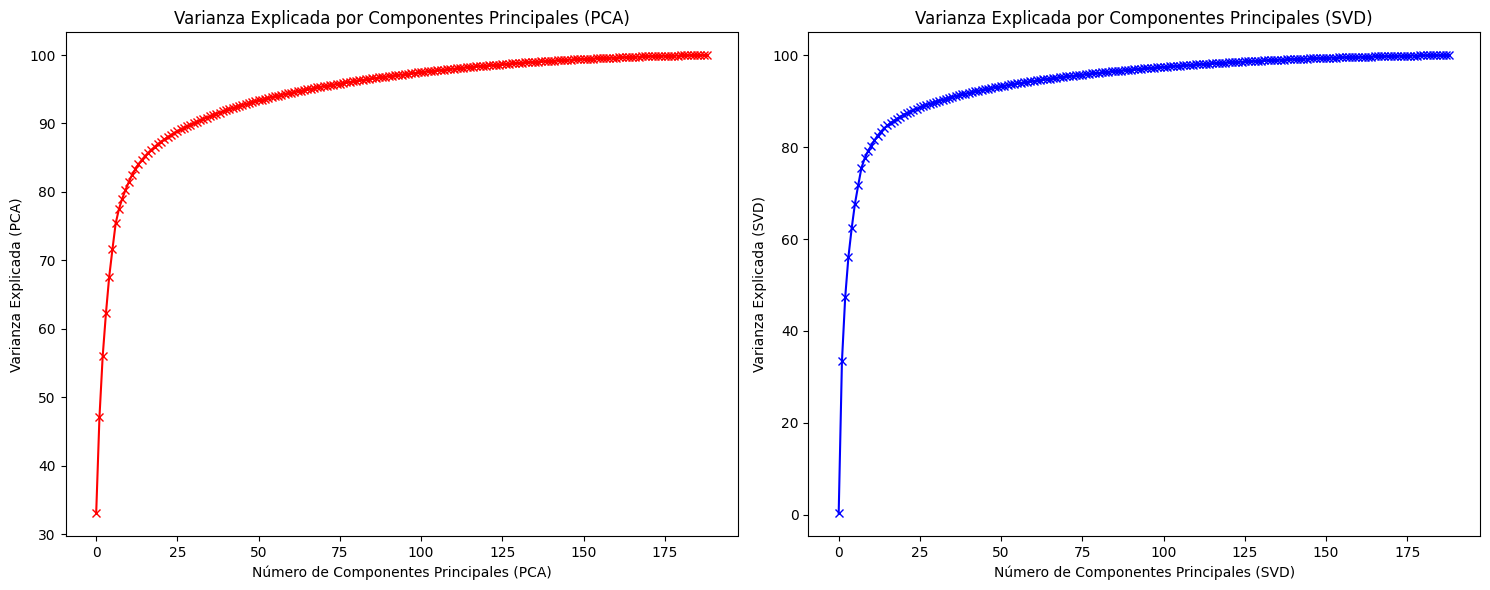

In [445]:
#PCA
pca = PCA()
pca.fit(data_escaled)
pca_data = pca.transform(data_escaled)
explained_variance_pca = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

# SVD con NumPy
svd = TruncatedSVD(n_components=data_escaled.shape[0])
svd.fit(data_escaled)
svd_data = svd.transform(data_escaled)
explained_variance_svd = np.cumsum(np.round(svd.explained_variance_ratio_, decimals=4) * 100)
# u, d, v = np.linalg.svd(data_escaled.astype(float), full_matrices=False)
# explained_variance_svd = np.cumsum((d ** 2) / np.sum(d ** 2) * 100)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(explained_variance_pca, 'r-x')
plt.xlabel('Número de Componentes Principales (PCA)')
plt.ylabel('Varianza Explicada (PCA)')
plt.title('Varianza Explicada por Componentes Principales (PCA)')

plt.subplot(1, 2, 2)
plt.plot(explained_variance_svd, 'b-x')
plt.xlabel('Número de Componentes Principales (SVD)')
plt.ylabel('Varianza Explicada (SVD)')
plt.title('Varianza Explicada por Componentes Principales (SVD)')

plt.tight_layout()
plt.show()


In [446]:
# num_components = 25
# svd_data = np.dot(u[:, :num_components], np.diag(d[:num_components]))
# print(u.shape, d.shape, v.shape)
# print(svd_data.shape)
print(svd_data.shape)
v1 = np.sum(pca.explained_variance_ratio_[:75]) * 100
v2 = np.sum(svd.explained_variance_ratio_[:75]) * 100
print("Varianza explicada por los primeros 25 componentes principales (PCA): ", v1)
print("Varianza explicada por los primeros 25 componentes principales (SVD): ", v2)

(189, 189)
Varianza explicada por los primeros 25 componentes principales (PCA):  95.7973753240125
Varianza explicada por los primeros 25 componentes principales (SVD):  95.72142781751968


In [447]:
# #Como vemos basta con 75 componentes para explicar el 95% de la varianza de los datos.
# svd = TruncatedSVD(n_components=75)
# svd.fit(data_escaled)
# svd_data = svd.transform(data_escaled)
# print(svd_data.shape)
pca_data = pd.DataFrame(pca_data[:,0:75])
pca_data = pca_data.values

K-Means

In [448]:
def Init_Centroide(data, k):#Implementación k++ para inicializar los centroides
    # indices = np.random.choice(data.shape[0], k, replace=False)
    # return data[indices]
    centroids = [data[np.random.choice(data.shape[0])]]
    for _ in range(1, k):
        distances = np.array([min(np.linalg.norm(p - c) ** 2 for c in centroids) for p in data])
        new_centroid = data[np.argmax(distances)]
        centroids.append(new_centroid)
    
    return centroids

In [449]:
def get_cluster(data, centroides):
    distancias = np.linalg.norm(data[:, np.newaxis, :] - centroides, axis=2)
    clusters = np.argmin(distancias, axis=1)
    return clusters

In [450]:
def return_new_centroide(grupos, data, k):
    new_centroides = np.zeros((k, data.shape[1]))#Matriz de ceros de k filas y n columnas en donde irán los nuevos centroides
    for i in range(k):
        cluster_points = data[grupos == i]
        if cluster_points.size > 0:
            new_centroides[i] = np.mean(cluster_points, axis=0)
    return new_centroides

In [451]:
def distancia_promedio_centroides(old_centroide, new_centroide):
    distancias = [np.linalg.norm(old - new) for old, new in zip(old_centroide, new_centroide)]

    distancia_promedio = np.mean(distancias)

    return distancia_promedio

In [452]:
def kmeans(data, k, umbral):
    centroides = Init_Centroide(data, k)
    clusters = get_cluster(data, centroides)
    new_centroides = return_new_centroide(clusters, data, k)
    # print("old", centroides)
    # print("new", new_centroides)
    while distancia_promedio_centroides(centroides, new_centroides) > umbral:
        # print("CENTROIDES", centroides, distancia_promedio_centroides(centroides, new_centroides))
        centroides = new_centroides
        clusters = get_cluster(data, centroides)
        new_centroides = return_new_centroide(clusters, data, k)

    return new_centroides, clusters

Encontrando el K óptimo

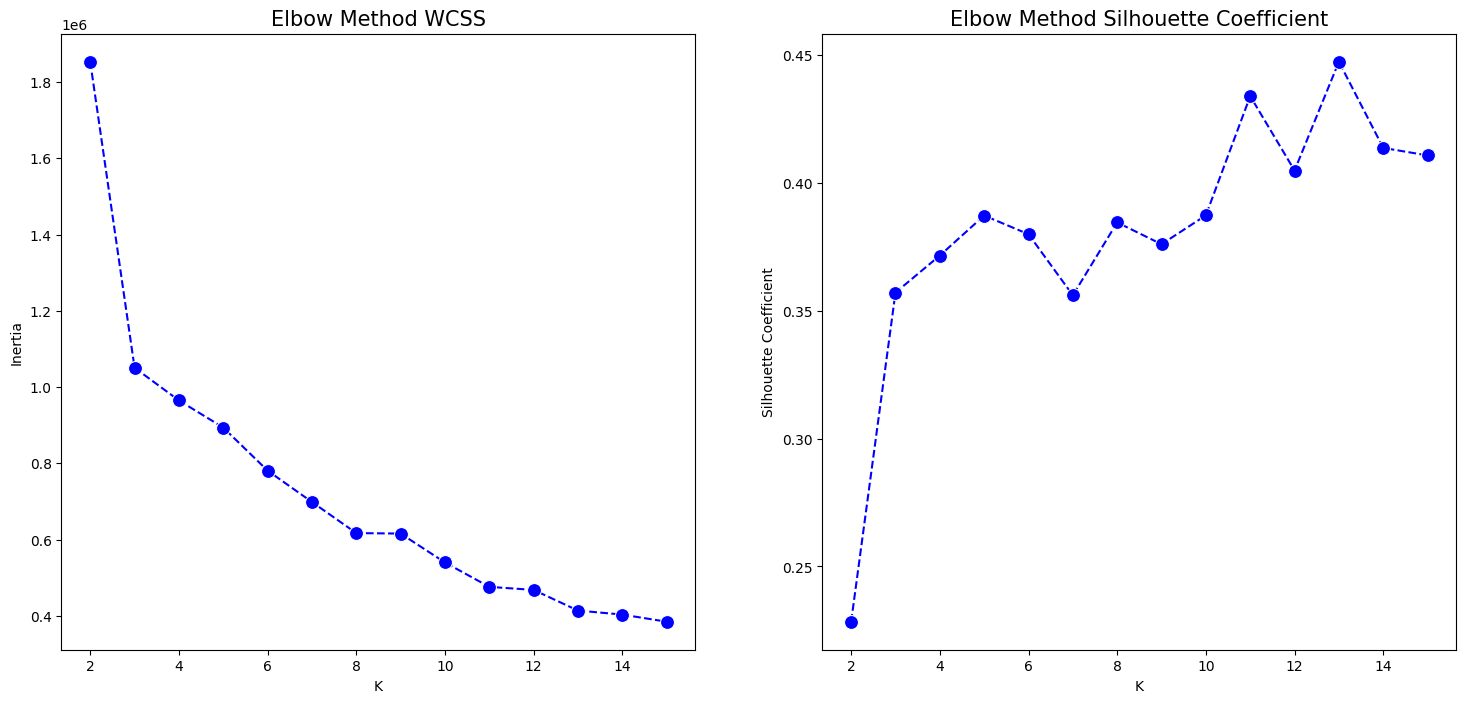

In [453]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def distance(v1, v2):
    return np.linalg.norm(v1 - v2)

def suma_cuadrados_distancias(data, centroides, clusters):
    distances = np.sum((data - centroides[clusters])**2, axis=1)
    return np.sum(distances)

def silhouette(data, clusters):
    n = len(data)
    a = np.zeros(n)
    b = np.zeros(n)

    for i in range(n):
        cluster_i = clusters[i]
        cluster_points_i = data[clusters == cluster_i]
        a[i] = np.mean(np.linalg.norm(data[i] - cluster_points_i, axis=1))

        min_b = np.inf
        for j in range(n):
            if clusters[j] != cluster_i:
                cluster_points_j = data[clusters == clusters[j]]
                dist = np.mean(np.linalg.norm(data[i] - cluster_points_j, axis=1))
                min_b = min(min_b, dist)
        b[i] = min_b

    silhouette_values = (b - a) / np.maximum(a, b)
    return np.mean(silhouette_values)

def metricas(data, max_k, umbral):
    distancias = []
    silhouettes = []
    for k in range(2, max_k + 1):
        centroides, clusters = kmeans(data, k, umbral)
        suma_distancias = suma_cuadrados_distancias(data, centroides, clusters)
        silhouette_value = silhouette(data, clusters)
        distancias.append(suma_distancias)
        silhouettes.append(silhouette_value)

    return distancias, silhouettes

umbral = 4.5
max_k = 15
K = range(2, max_k + 1)

distancias, silhouette_scores = metricas(pca_data, max_k, umbral)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

for i, (values, title) in enumerate([(distancias, 'Elbow Method WCSS'), (silhouette_scores, 'Elbow Method Silhouette Coefficient')]):
    sns.lineplot(ax=axes[i], x=K, y=values, linestyle='dashed', marker='o', markersize=10, color='b')
    axes[i].set_xlabel('K')
    axes[i].set_ylabel('Inertia' if i == 0 else 'Silhouette Coefficient')
    axes[i].set_title(title, size=15)

plt.show()
# Inicializar listas para almacenar las métricas

Entrenamiento

In [456]:
new_centroides, clusters = kmeans(svd_data, k, umbral)
print("CLUSTERS", clusters)
print(silhouette(pca_data, clusters))

#Voy a tomar la primera fila de la data original
data_column = data.iloc[0]
data_complete = pd.DataFrame(data)
data_complete = data_complete[1:]
data.columns = data_column
data_complete['cluster'] = clusters
print(new_centroides.shape)



CLUSTERS [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6
 6 6 6 6 6 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 6 6 6 4 4 4 6 6 6 4 4 4 6 6 1 5 4 4 4 4 4 4 2 2 2 2 2 2
 0 6 0 0 0 6 0 0 6 6 6 6 6 6 6 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 3 3
 3 3 3 3]


0.37414753856958705
(7, 189)


In [457]:
rows1 = data.drop(['Unnamed: 0'], axis=0).index
clases.index = rows1
clases

for i in range(0, k):
    print("Cluster: ", i)
    indices = data_complete[data_complete['cluster'] == i].index.values
    print(clases['x'][indices])
    print("")

Cluster:  0
GSM92240.CEL.gz           colon
GSM92241.CEL.gz           colon
GSM92242.CEL.gz           colon
GSM92243.CEL.gz           colon
GSM92244.CEL.gz           colon
GSM92245.CEL.gz           colon
GSM92247.CEL.gz           colon
GSM92248.CEL.gz           colon
GSM92249.CEL.gz           colon
GSM92250.CEL.gz           colon
GSM92253.CEL.gz           colon
GSM92254.CEL.gz           colon
GSM92255.CEL.gz           colon
GSM92256.CEL.gz           colon
GSM92257.CEL.gz           colon
GSM92258.CEL.gz           colon
GSM92259.CEL.gz           colon
GSM92260.CEL.gz           colon
GSM92261.CEL.gz           colon
GSM92262.CEL.gz           colon
GSM92263.CEL.gz           colon
GSM92264.CEL.gz           colon
GSM92265.CEL.gz           colon
GSM92266.CEL.gz           colon
GSM92267.CEL.gz           colon
GSM92268.CEL.gz           colon
GSM92269.CEL.gz           colon
GSM92270.CEL.gz           colon
GSM92271.CEL.gz           colon
GSM92272.CEL.gz           colon
GSM92273.CEL.gz           co

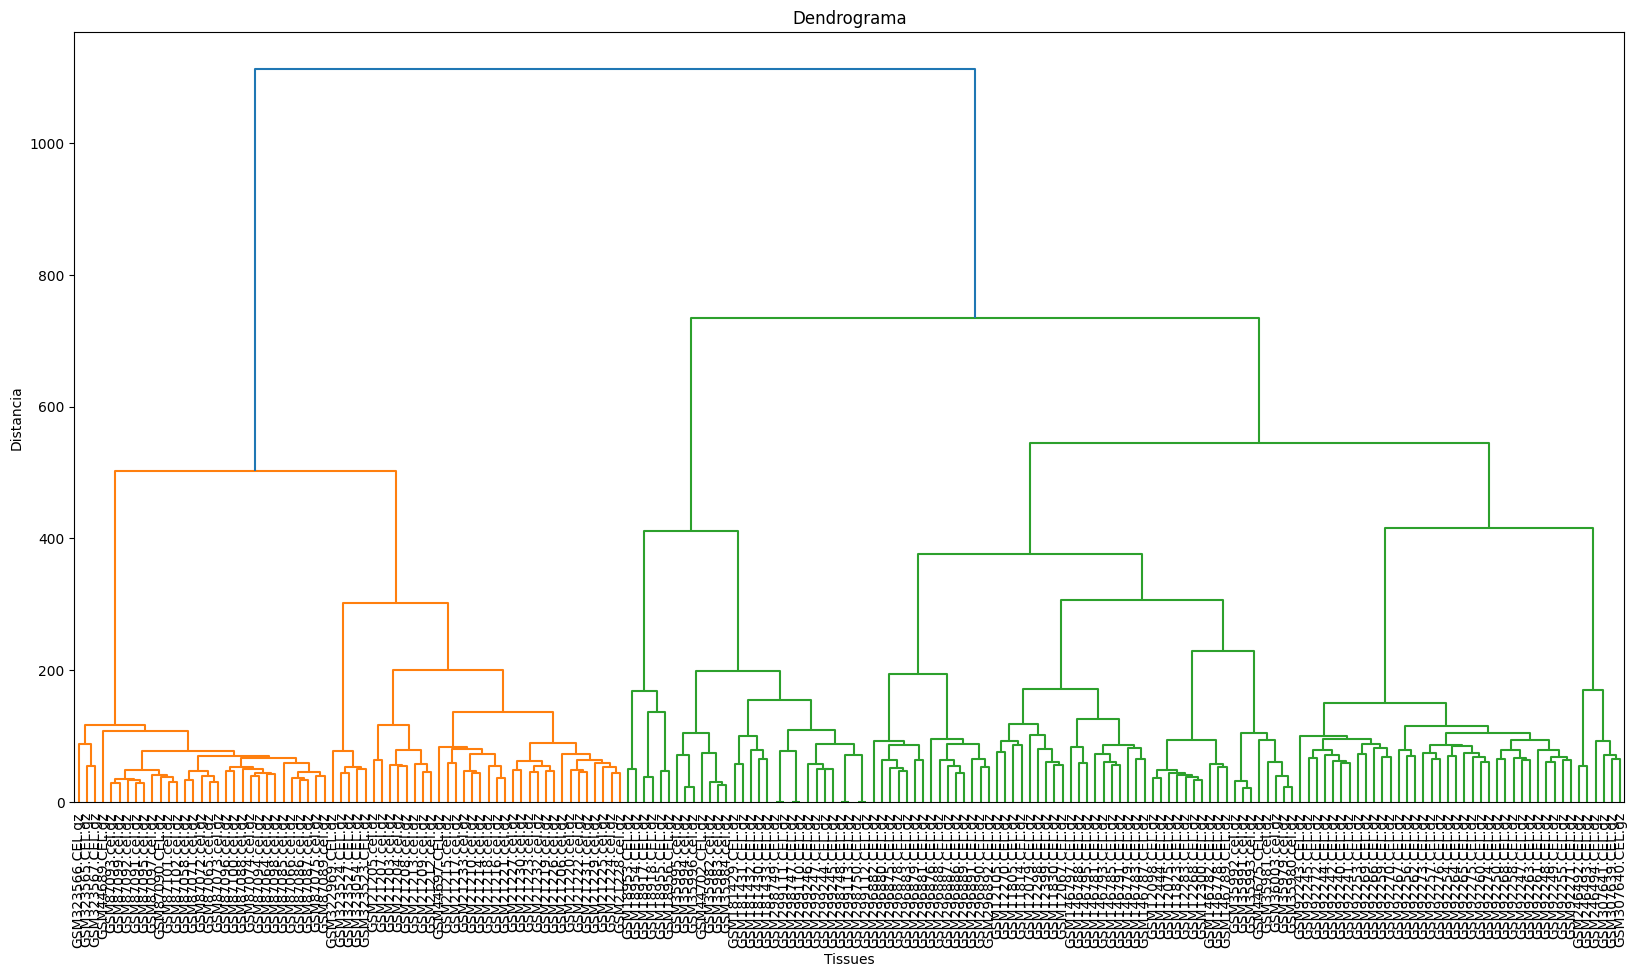

In [458]:
fig = plt.figure(figsize=(20, 10))
dendrogram(linkage(data_complete, method='ward'), labels=data_complete.index, leaf_font_size=10)
plt.title('Dendrograma')
plt.xlabel('Tissues')
plt.ylabel('Distancia')
plt.show()